In [2]:
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm

In [26]:
x1=pd.read_excel("qmj.xlsx",sheet_name="QMJ Factors",skiprows=18)

In [27]:
x2=pd.read_excel("qmj.xlsx",sheet_name="MKT",skiprows=18)

In [38]:
x3=pd.read_excel("qmj.xlsx",sheet_name="SMB",skiprows=18)
x4=pd.read_excel("qmj.xlsx",sheet_name="HML FF",skiprows=18)
x5=pd.read_excel("qmj.xlsx",sheet_name="UMD",skiprows=18)

In [43]:
x1=x1[['DATE',"USA"]]
x1.rename(columns={"USA":"QMJ"},inplace=True)
x2=x2[['DATE',"USA"]]
x2.rename(columns={"USA":"MKT"},inplace=True)
x3=x3[['DATE',"USA"]]
x3.rename(columns={"USA":"SMB"},inplace=True)
x4=x4[['DATE',"USA"]]
x4.rename(columns={"USA":"HML"},inplace=True)
x5=x5[['DATE',"USA"]]
x5.rename(columns={"USA":"UMD"},inplace=True)

In [67]:
X=[x2,x3,x4,x5]
data=x1
for xx in X:
    data=pd.merge(data,xx,on='DATE')

data.head()
    
    

,DATE,QMJ,MKT,SMB,HML,UMD
0,07/01/1957,-0.001566,0.001784,-0.002166,0.001984,0.000651
1,07/02/1957,-0.000484,0.008514,-0.005030,-0.004436,0.002705
2,07/03/1957,0.000869,0.007938,-0.001245,-0.003676,0.002294
3,07/05/1957,0.001975,0.007755,-0.000769,-0.002781,-0.001137
4,07/08/1957,0.000965,0.003658,-0.002349,-0.004770,0.000742


In [68]:
data['DATE']=pd.to_datetime(data['DATE'])
data

,DATE,QMJ,MKT,SMB,HML,UMD
0,1957-07-01,-0.001566,0.001784,-0.002166,0.001984,0.000651
1,1957-07-02,-0.000484,0.008514,-0.005030,-0.004436,0.002705
2,1957-07-03,0.000869,0.007938,-0.001245,-0.003676,0.002294
3,1957-07-05,0.001975,0.007755,-0.000769,-0.002781,-0.001137
4,1957-07-08,0.000965,0.003658,-0.002349,-0.004770,0.000742
...,...,...,...,...,...,...
16069,2020-01-27,-0.000060,-0.015002,0.002623,-0.003787,0.001516
16070,2020-01-28,-0.001326,0.009827,-0.001783,-0.004375,0.005535
16071,2020-01-29,-0.001279,-0.001363,-0.002856,-0.004012,0.007345
16072,2020-01-30,0.001254,0.002892,-0.006571,0.002776,0.000165


In [69]:
for ind in data.columns[1:]:
    data[f'{ind}_CumRet']=(data[ind]+1).cumprod()-1
data

,DATE,QMJ,MKT,SMB,HML,UMD,QMJ_CumRet,MKT_CumRet,SMB_CumRet,HML_CumRet,UMD_CumRet
0,1957-07-01,-0.001566,0.001784,-0.002166,0.001984,0.000651,-0.001566,0.001784,-0.002166,0.001984,0.000651
1,1957-07-02,-0.000484,0.008514,-0.005030,-0.004436,0.002705,-0.002049,0.010313,-0.007185,-0.002460,0.003358
2,1957-07-03,0.000869,0.007938,-0.001245,-0.003676,0.002294,-0.001182,0.018333,-0.008421,-0.006127,0.005659
3,1957-07-05,0.001975,0.007755,-0.000769,-0.002781,-0.001137,0.000791,0.026231,-0.009183,-0.008891,0.004516
4,1957-07-08,0.000965,0.003658,-0.002349,-0.004770,0.000742,0.001757,0.029985,-0.011511,-0.013619,0.005262
...,...,...,...,...,...,...,...,...,...,...,...
16069,2020-01-27,-0.000060,-0.015002,0.002623,-0.003787,0.001516,11.486911,24.979340,1.054563,3.500107,109.468954
16070,2020-01-28,-0.001326,0.009827,-0.001783,-0.004375,0.005535,11.470355,25.234631,1.050900,3.480419,110.080349
16071,2020-01-29,-0.001279,-0.001363,-0.002856,-0.004012,0.007345,11.454402,25.198860,1.045042,3.462446,110.896247
16072,2020-01-30,0.001254,0.002892,-0.006571,0.002776,0.000165,11.470024,25.274626,1.031604,3.474832,110.914663


<AxesSubplot:xlabel='DATE', ylabel='cumulative returns'>

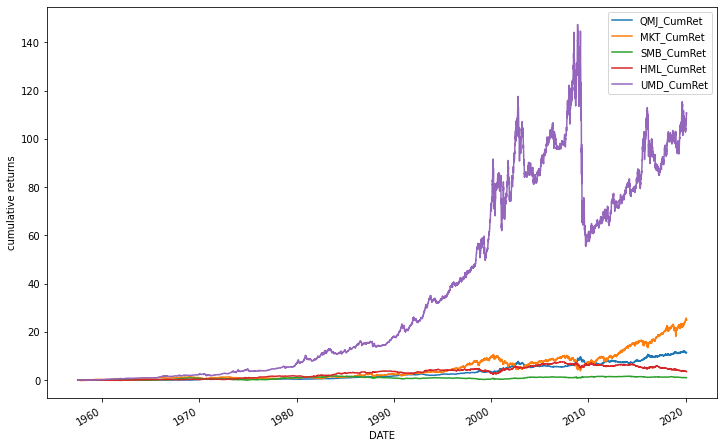

In [87]:

plt.rcParams["figure.figsize"] = (12,8)



data.set_index('DATE').iloc[:,[5,6,7,8,9]].plot(ylabel='cumulative returns')

In [91]:
data.set_index('DATE').iloc[:,[0,1,2,3,4]].mean()/data.set_index('DATE').iloc[:,[0,1,2,3,4]].std()*256**0.5

QMJ    0.672761
MKT    0.417965
SMB    0.191850
HML    0.379840
UMD    0.768127
dtype: float64

In [106]:
for i in range(int(len(data)/3000)+1):
    print("For Period:")
    print(data.iloc[i*3000,0],data.iloc[min(i*3000+3000,len(data)-1),0])
    print(data.set_index('DATE').iloc[i*3000:min(i*3000+3000,len(data)-1),[0,1,2,3,4]].mean()/data.set_index('DATE').iloc[i*3000:min(i*3000+3000,len(data)-1),[0,1,2,3,4]].std()*256**0.5)

For Period:
1957-07-01 00:00:00 1969-07-10 00:00:00
QMJ    0.304687
MKT    0.684856
SMB    1.081781
HML    0.652165
UMD    1.412724
dtype: float64
For Period:
1969-07-10 00:00:00 1981-05-27 00:00:00
QMJ    0.437794
MKT    0.113607
SMB    0.433902
HML    0.781450
UMD    1.315895
dtype: float64
For Period:
1981-05-27 00:00:00 1992-12-22 00:00:00
QMJ    2.032046
MKT    0.428313
SMB   -0.256722
HML    0.850544
UMD    1.327716
dtype: float64
For Period:
1992-12-22 00:00:00 2004-06-22 00:00:00
QMJ    0.802896
MKT    0.429229
SMB    0.245373
HML    0.499117
UMD    0.868156
dtype: float64
For Period:
2004-06-22 00:00:00 2015-12-22 00:00:00
QMJ    0.451110
MKT    0.393206
SMB    0.075020
HML   -0.126506
UMD    0.215639
dtype: float64
For Period:
2015-12-22 00:00:00 2020-01-31 00:00:00
QMJ    0.636539
MKT    0.970377
SMB   -0.316117
HML   -0.708449
UMD    0.116115
dtype: float64


In [119]:
X=sm.add_constant(data['MKT'])
Y=data['QMJ']
model1=sm.OLS(Y,X)
model1.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    QMJ   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     4080.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        15:34:54   Log-Likelihood:                 68140.
No. Observations:               16074   AIC:                        -1.363e+05
Df Residuals:                   16072   BIC:                        -1.363e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   2.75e-05      7.635      0.000       0.000       0.000
MKT           -0.1857      0.003    -63.871      0.000      -0.191      -0.180
==============================================================================
Omnibus:                     2579.725   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47918.220
Skew:                           0.126   Prob(JB):                         0.00
Kurtosis:                      11.455   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
X=sm.add_constant(data['MKT'])
Y=data['SMB']
model1=sm.OLS(Y,X)
model1.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SMB   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     629.1
Date:                Tue, 17 May 2022   Prob (F-statistic):          3.28e-136
Time:                        15:35:25   Log-Likelihood:                 64307.
No. Observations:               16074   AIC:                        -1.286e+05
Df Residuals:                   16072   BIC:                        -1.286e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.703e-05   3.49e-05      2.204      0.028    8.53e-06       0.000
MKT           -0.0926      0.004    -25.081      0.000      -0.100      -0.085
==============================================================================
Omnibus:                     4033.045   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98406.887
Skew:                          -0.643   Prob(JB):                         0.00
Kurtosis:                      15.053   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
X=sm.add_constant(data['MKT'])
Y=data['HML']
model1=sm.OLS(Y,X)
model1.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HML   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1522.
Date:                Tue, 17 May 2022   Prob (F-statistic):          4.23e-318
Time:                        15:35:40   Log-Likelihood:                 65430.
No. Observations:               16074   AIC:                        -1.309e+05
Df Residuals:                   16072   BIC:                        -1.308e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   3.26e-05      4.167      0.000    7.19e-05       0.000
MKT           -0.1343      0.003    -39.008      0.000      -0.141      -0.128
==============================================================================
Omnibus:                     2414.635   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40526.972
Skew:                          -0.046   Prob(JB):                         0.00
Kurtosis:                      10.778   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
X=sm.add_constant(data['MKT'])
Y=data['UMD']
model1=sm.OLS(Y,X)
model1.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UMD   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 17 May 2022   Prob (F-statistic):           8.43e-42
Time:                        15:35:45   Log-Likelihood:                 58087.
No. Observations:               16074   AIC:                        -1.162e+05
Df Residuals:                   16072   BIC:                        -1.162e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   5.15e-05      6.474      0.000       0.000       0.000
MKT           -0.0738      0.005    -13.584      0.000      -0.084      -0.063
==============================================================================
Omnibus:                     4894.093   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           581068.735
Skew:                          -0.380   Prob(JB):                         0.00
Kurtosis:                      32.445   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
X=sm.add_constant(data[['QMJ','SMB','HML','UMD']])
Y=data['MKT']
model1=sm.OLS(Y,X)
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MKT   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     3186.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        15:39:42   Log-Likelihood:                 56792.
No. Observations:               16074   AIC:                        -1.136e+05
Df Residuals:                   16069   BIC:                        -1.135e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006   5.59e-05     10.873      0.000       0.000       0.001
QMJ           -1.4327      0.015    -92.514      0.000      -1.463      -1.402
SMB           -0.6354      0.013    -50.147      0.000      -0.660      -0.611
HML           -0.8721      0.013    -65.704      0.000      -0.898      -0.846
UMD           -0.0040      0.009     -0.448      0.654      -0.022       0.014
==============================================================================
Omnibus:                     3490.320   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129313.911
Skew:                          -0.251   Prob(JB):                         0.00
Kurtosis:                      16.886   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
model1.fit().params

const    0.000608
QMJ     -1.432707
SMB     -0.635388
HML     -0.872128
UMD     -0.004034
dtype: float64

In [135]:
rets_st1=data[['DATE']]
rets_st1['ret_st1']=0
rets_st1['ret_st1']=data['MKT']- np.dot(data[['QMJ','SMB','HML','UMD']],model1.fit().params[1:])


/Users/Ben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Ben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='DATE'>

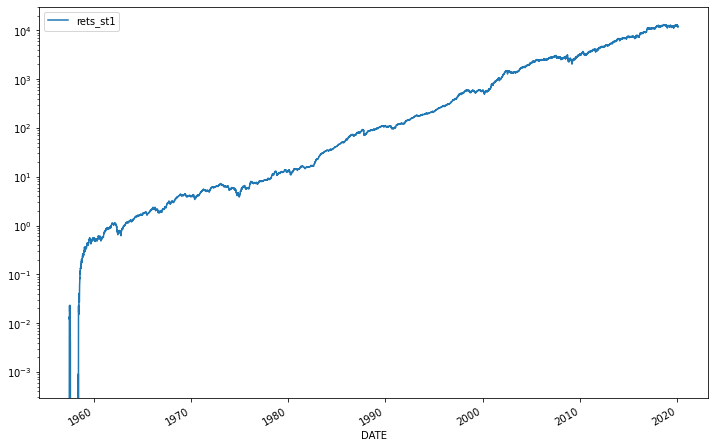

In [139]:
data['rets_st1']=rets_st1['ret_st1']
((data.set_index('DATE')[['rets_st1']]+1).cumprod()-1).plot(logy=True)

In [137]:
data['rets_st1'].mean()/data['rets_st1'].std()*255**0.5

1.3730047990296788

In [140]:
data['rets_st1'].mean()*255

0.15498299384000977